In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define function that incorporates a a quadratic term as a drag
g = 9.8
c_d=.45
rho=1
area= 1.26*10**-3 #cross sectional area of ping pong ball in m^2
mass=2.7*10**-3 #mass of ping pong ball in kg
# gamma = .5*(1/mass)*rho*area*c_d
gamma = 0.01

def drag(v_):
  """
  Function that incorporates a quadratic term as a drag
  Parameters
  ----------
  v_ : Float
        Value of v
  g : Float
        Value of g
  """
  return - gamma*np.square(v_) + g

# Implementing solver as a function
def rk4_drag(f,t0,tN, N):
  """
  Runge-Kutta Implementation:

  """
  t = np.linspace(t0, tN, N)
  v = np.zeros(N)
  y = np.zeros(N)
  h = (tN-t0)/N
  for n in range(1,N):
    k1 = h*f(v[n-1]       )
    k2 = h*f(v[n-1] + k1/2)
    k3 = h*f(v[n-1] + k2/2)
    k4 = h*f(v[n-1] + k3  )

    v[n] = v[n-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    y[n] = y[n-1] + v[n]*h
  return t, y, v

In [3]:
# Define initial conditions and number of steps
t0 = 0
tf = 10.0
N  = 50
# Solve the ODE
solver_drag = rk4_drag(drag,t0,tf, N)

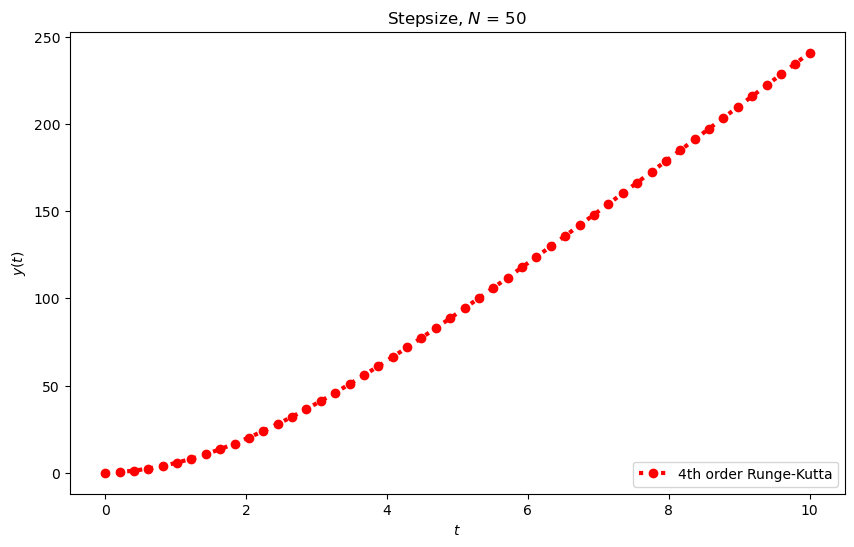

In [4]:
# Plot the solution
plt.figure(figsize=(10,6))
plt.plot(solver_drag[0],solver_drag[1],':ro' , linewidth=3.0,label=r'4th order Runge-Kutta')
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.title(r'Stepsize, $N$ = %i' % 50)
plt.legend(loc=4)
plt.show()

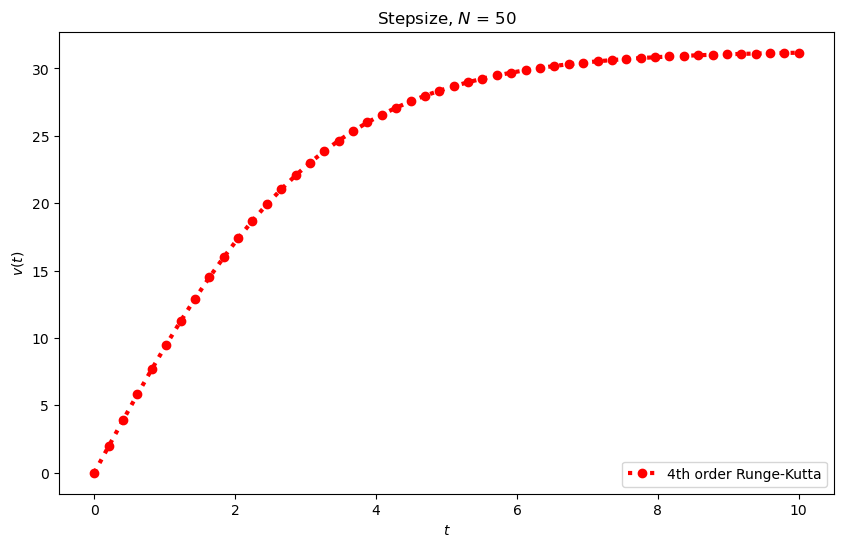

In [5]:
# Plot the solution
plt.figure(figsize=(10,6))
plt.plot(solver_drag[0],solver_drag[2],':ro' , linewidth=3.0,label=r'4th order Runge-Kutta')
plt.ylabel(r'$v(t)$')
plt.xlabel(r'$t$')
plt.title(r'Stepsize, $N$ = %i' % 50)
plt.legend(loc=4)
plt.show()